# Zonal structure of time-mean SST in the equatorial Pacific

Computes the zonal root mean square error (RMSE) of equatorial Pacific (150°E-90°W) climatological (time and meridional 5°S-5°N average) sea surface temperature (SST) between model and observations

### Observations and reanalysis datasets used for comparison

- **HadISST (1870-2018)**: The Hadley Centre Sea Ice and Sea Surface Temperature dataset offers global monthly SST and sea ice concentration fields, incorporating in-situ and satellite data for climate variability analysis.

### ESM1.6 piControl Spin up
- This spin-up has been added as another dataset for comparison.
- The spin-up is cmorised in this notebook and converted to an `iris` cube to run the same preprocessing and plotting steps as the oter datasets

## Dask Cluster 

Start a cluster with multiple cores 

In [ ]:
from dask.distributed import Client
client = Client()
client

## Comparison for ESM1.6

- Use ACCESS-MOPPy interactive API to CMORise required variable. (May take some time as depends on number of files to read)
- Can write output to netCDF to read in later in other notebooks and workflows
- Convert to iris cube to tie into recipe

In [1]:
import glob
from access_moppy import ACCESS_ESM_CMORiser

ROOT_FOLDER = (
    "/g/data/p73/archive/CMIP7/ACCESS-ESM1-6/spinup/JuneSpinUp-JuneSpinUp-bfaa9c5b/"
)

OUTPUT_FOLDER = "/scratch/nf33/fc6164/MOPPeR"


Loaded Configuration:
Creator Name: Felicity Chun
Organisation: ACCESS-NRI
Creator Email: felicity.chun@anu.edu.au
Creator URL: https://orcid.org/0009-0007-0845-0953


In [3]:
# using esm1.5 cmip6 values while cmip7 still to finalise
parent_experiment_config = {
    "parent_experiment_id": "piControl",
    "parent_activity_id": "CMIP",
    "parent_source_id": "ACCESS-ESM1-5",
    "parent_variant_label": "r1i1p1f1",
    "parent_time_units": "days since 0001-01-01 00:00:00",
    "parent_mip_era": "CMIP6",
    "branch_time_in_child": 0.0,
    "branch_time_in_parent": 54786.0,
    "branch_method": "standard",
}

In [4]:

FILES = glob.glob(ROOT_FOLDER + "output0[0-9][0-9]/atmosphere/netCDF/*mon.nc")
len(FILES)
## reduce the years to cmorise by the output folders

1200

In [5]:
cmoriser = ACCESS_ESM_CMORiser(
    input_paths=FILES,
    compound_name="Amon.ts",
    experiment_id="piControl",
    source_id="ACCESS-ESM1-5",
    variant_label="r1i1p1f1",
    grid_label="gn",
    activity_id="CMIP",
    output_path=OUTPUT_FOLDER,
    parent_info=parent_experiment_config,  # <-- This is optional, can be skipped if not needed
)

In [6]:
cmoriser.run()

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/xarray/backends/plugins.py:109: RuntimeWarning: Engine 'argo' loading failed:
Expecting value: line 1 column 1 (char 0)
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)
INFO:httpx:HTTP Request: GET https://raw.githubusercontent.com/IrishMarineInstitute/awesome-erddap/master/erddaps.json "HTTP/1.1 200 OK"
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/access_moppy/base.py:56: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  self.ds = xr.open_mfdataset(


In [7]:
# cmoriser.write()
esm16 = cmoriser.to_iris()[0]

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/cf.py:664: IrisCfMissingVarWarning: Missing CF-netCDF grid mapping variable 'latitude_longitude', referenced by netCDF variable 'ts'
  warnings.warn(
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/iris/fileformats/cf.py:880: IrisCfMissingVarWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ts'
  warnings.warn(


In [10]:
esm16

<iris 'Cube' of surface_temperature / (K) (longitude: 192; latitude: 145; time: 1200)>

## Datasets

In [8]:
from esmvalcore.dataset import Dataset

In [9]:
model_datasets = {
"ACCESS-ESM1-5": 
    Dataset(
    short_name='ts',
    project='CMIP6',
    mip="Amon",
    exp="piControl",
    ensemble="r1i1p1f1",
    # timerange="18500101/20190101",
    dataset="ACCESS-ESM1-5",
    grid="gn"
),
}

obs_datasets = {
"HadISST": 
    Dataset(
    short_name='ts',
    dataset='HadISST',
    mip="Amon",
    project='OBS',
    type='reanaly',
    tier=2),
}

## Add Ancillary files

In [11]:
for name, dataset in model_datasets.items():
    dataset.add_supplementary(short_name='sftlf', mip="fx")
    dataset.add_supplementary(short_name="areacella", mip="fx")

In [12]:
model_datasets = {name: dataset.load() for name, dataset in model_datasets.items()}
obs_datasets = {name: dataset.load() for name, dataset in obs_datasets.items()}

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/esmvalcore/config/_config.py:59: ESMValCoreDeprecationWarning: Usage of extra facets located in ~/.esmvaltool/extra_facets has been deprecated in ESMValCore version 2.13.0 and is scheduled for removal in version 2.15.0. Please use the configuration option `extra_facets` instead (see https://github.com/ESMValGroup/ESMValCore/pull/2747 for details). To silent this warning and ignore deprecated extra facets, set the environment variable ESMVALTOOL_USE_NEW_EXTRA_FACETS_CONFIG=1.
  warn_if_old_extra_facets_exist()
(for file /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/fx/sftlf/gn/v20210316/sftlf_fx_ACCESS-ESM1-5_piControl_r1i1p1f1_gn.nc)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/esmvalcore/config/_config.py:59: ESMValCoreDeprecationWarning: Usage of extra facets located in ~/.esmvaltool/extra_facets has been deprecated in ESMValCore v

In [13]:
from esmvalcore.preprocessor import climate_statistics
from esmvalcore.preprocessor import convert_units
from esmvalcore.preprocessor import extract_region
from esmvalcore.preprocessor import extract_time
from esmvalcore.preprocessor import regrid
from esmvalcore.preprocessor import axis_statistics
from esmvalcore.preprocessor import mask_landsea

import numpy as np

In [14]:
def prepoc1(cube):
    nino3_ep_region = {"start_longitude": 150., "end_longitude": 270., "start_latitude": -5., "end_latitude": 5.}    
    cube = convert_units(cube, units="degC")
    cube = regrid(cube, target_grid="1x1", scheme="linear")
    cube = mask_landsea(cube, mask_out="land")
    cube = climate_statistics(cube, operator="mean", period="full")
    cube = extract_region(cube, **nino3_ep_region)
    cube = axis_statistics(cube, operator="mean", axis="y")
    return cube

def prepoc2(cube):
    nino3_latext_region = {"start_longitude": 140., "end_longitude": 270., "start_latitude": -15., "end_latitude": 15.}
    # cube = extract_time(cube, start_year=1900, start_month=1, start_day=1, end_year=2014, end_month=12, end_day=31)
    cube = convert_units(cube, units="degC")
    cube = regrid(cube, target_grid="1x1", scheme="linear")
    cube = mask_landsea(cube, mask_out="land") #uses shapefiles, ancVariable, land_area_fraction
    cube = climate_statistics(cube, operator="mean", period="full")
    cube = extract_region(cube, **nino3_latext_region)
    return cube

In [15]:
model_datasets_prep1 = {name: prepoc1(dataset) for name, dataset in model_datasets.items()}
obs_datasets_prep1 = {name: prepoc1(dataset) for name, dataset in obs_datasets.items()}

esm16_prep1 = prepoc1(esm16)

In [16]:
esm16_prep1.data
rmse = np.sqrt(np.mean((esm16_prep1.data - model_datasets_prep1["ACCESS-ESM1-5"].data) ** 2))
rmse

0.7149879

In [17]:
model_datasets_prep2 = {name: prepoc2(dataset) for name, dataset in model_datasets.items()}
obs_datasets_prep2 = {name: prepoc2(dataset) for name, dataset in obs_datasets.items()}
esm16_prep2 = prepoc2(esm16)

# Diagnostics Level 1


In [18]:
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

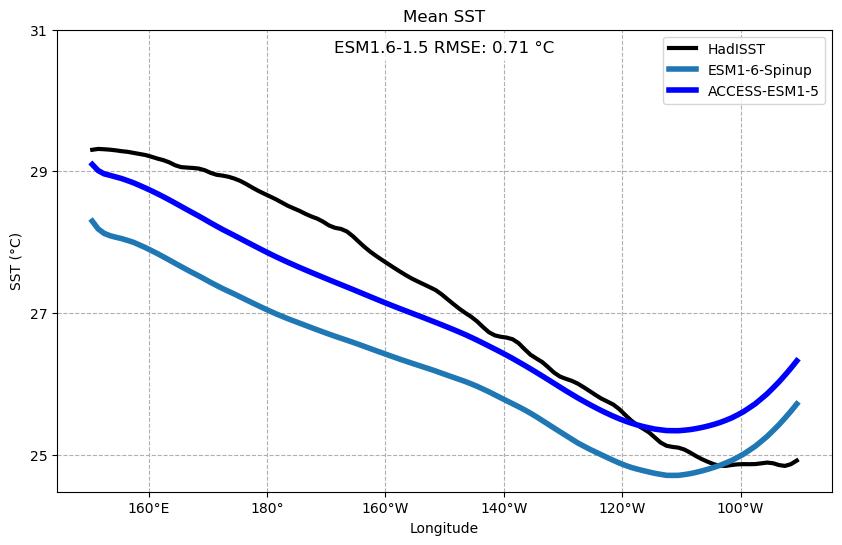

In [19]:

# Function to format x-axis labels with degree symbols and N/S
def format_longitude(x, pos):
    if x > 180:
        return f'{int(360 - x)}°W'
    elif x == 180:
        return f'{int(x)}°'
    else:
        return f'{int(x)}°E'

plt.figure(figsize=(10, 6))

obs_data = obs_datasets_prep1["HadISST"]
model_data = model_datasets_prep1["ACCESS-ESM1-5"]

# Plot observation data in black
qplt.plot(obs_data, color='black', label='HadISST', linewidth=3)

qplt.plot(esm16_prep1, color='tab:blue', label='ESM1-6-Spinup', linewidth=4)

# Plot model data in blue
qplt.plot(model_data, color='blue', label='ACCESS-ESM1-5', linewidth=4)

# rmse = np.sqrt(np.mean((obs_data.data - model_data.data) ** 2))

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('SST (°C)')
plt.title('Mean SST')
plt.grid(linestyle='--')
plt.yticks(np.arange(25,32, step=2))

# Adding RMSE text on top of the plot
plt.text(0.5, 0.95, f'ESM1.6-1.5 RMSE: {rmse:.2f} °C', fontsize=12, ha='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Setting custom x-axis formatter
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_longitude))

# Adding a legend
plt.legend()

# Display the plot
plt.show()

Figure 1: Zonal bias in the sea surface temperature (SST) structure across the equatorial Pacific (averaged between 5°S–5°N), primarily illustrating the cold tongue bias (typically warmer near South America and cooler further west). The black curve represents the reference data, while the blue curve represents the model data. The metric displayed is the zonal RMSE between the model and reference curves.

# Diagnostics Level 2


In [20]:
esm16_prep2.data.mean() #realises data

26.903422734942886

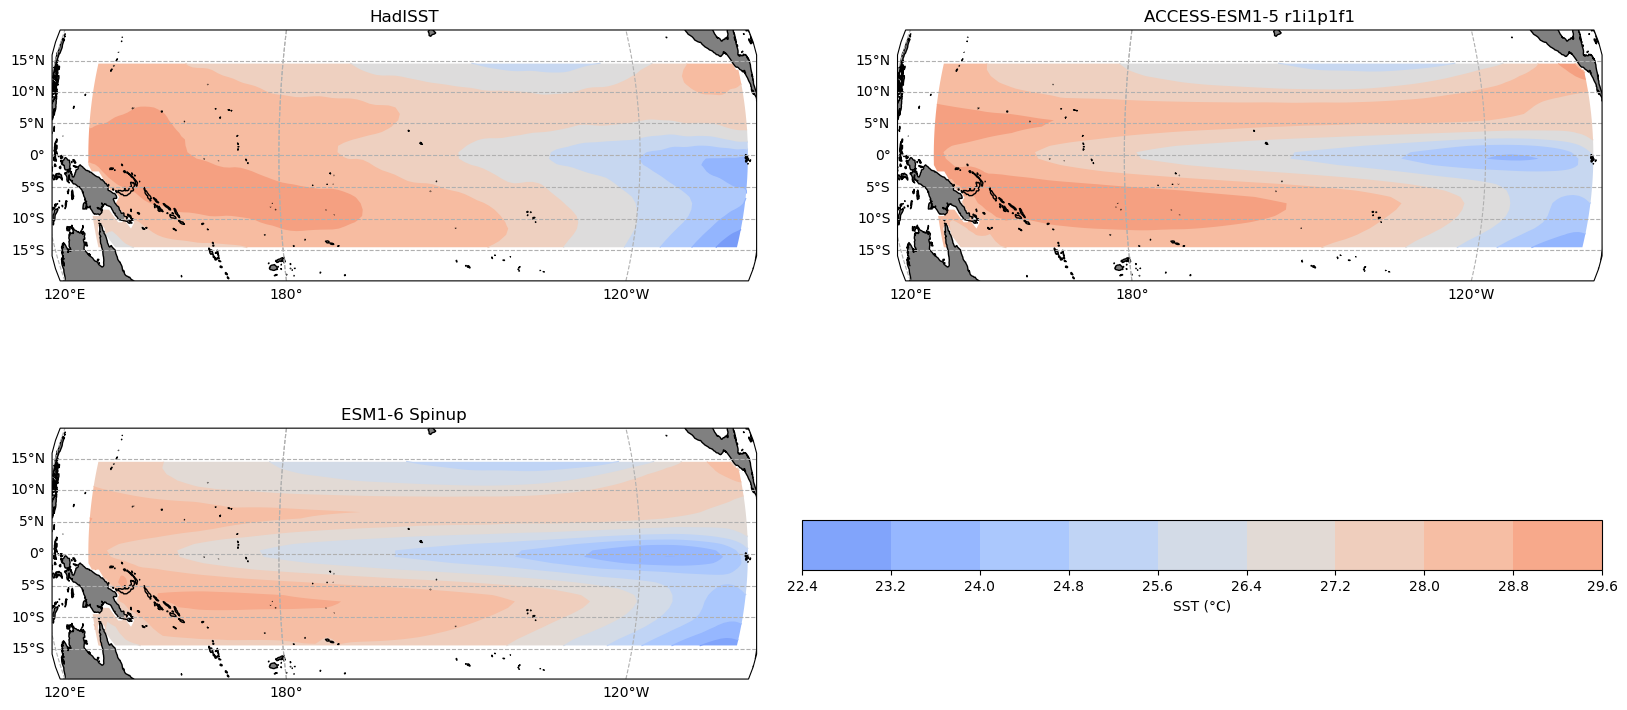

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Importing numpy for linear space creation
import numpy as np

import iris.plot as iplt

pltdata_labels = {"HadISST" :obs_datasets_prep2["HadISST"],
                  "ACCESS-ESM1-5 r1i1p1f1":model_datasets_prep2["ACCESS-ESM1-5"],
                  "ESM1-6 Spinup": esm16_prep2}

# Use the coolwarm colormap
cmap = plt.get_cmap('coolwarm')

# Create a large figure
fig = plt.figure(figsize=(20, 10))  # Adjusted for full width

# Center the map on the Pacific Ocean (roughly around 180° longitude)
proj = ccrs.Orthographic(central_longitude=-160, central_latitude=0)

# Define the normalization for the color scale with range of 20 to 33°C
norm = mcolors.Normalize(vmin=20, vmax=33)

# Plot all datasets
i = 221
for title, data in pltdata_labels.items():

    ax1 = plt.subplot(i, projection=proj)
    cf1 = iplt.contourf(data, cmap=cmap, norm=norm)
    ax1.add_feature(cfeature.LAND, facecolor='gray')  # Add land feature with gray color
    ax1.coastlines()
    ax1.set_extent([120, -80, -20, 20], crs=ccrs.PlateCarree())
    ax1.set_title(title)
    
    # Add gridlines for latitude and longitude
    gl1 = ax1.gridlines(draw_labels=True, linestyle='--')
    gl1.top_labels = False
    gl1.right_labels = False
    i += 1

plt.subplots_adjust(bottom=0.15)  # Further adjust bottom margin to fit the colorbar
# Add a single colorbar
cax = plt.axes([0.5,0.3,0.4,0.05])
cbar = fig.colorbar(cf1, cax=cax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('SST (°C)')
#cbar.set_ticks(np.arange(20, 33))  # Set ticks at intervals of 2 degrees

plt.show()


Figure 2: Time-mean sea surface temperature (SST) bias in the equatorial Pacific, primarily highlighting the cold tongue bias (warmer near South America and cooler further west). The left map displays the reference data, and the right map shows the model data.

In [27]:
client.close()